In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r"D:\data\SuperStoreOrders.csv")
data

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.1400,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.0360,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.6400,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.0550,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.7700,4.70,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,31-12-2014,2/1/2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014


The SuperStoreOrders dataset provides an overview of global retail sales transactions from 2011 to 2014, containing exactly 51,290 records and 21 variables. It includes detailed information about orders, customers, products, shipping methods, sales, discounts, profits, and regions. The dataset helps analyze sales performance, customer segments, product categories, and overall profitability trends.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [3]:
data.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [4]:
data.duplicated().sum()

np.int64(0)

The dataset contains no missing (null) values and no duplicate records. All entries are complete and consistent, making the data clean, reliable, and ready for further analysis. 

In [6]:
data.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

📊 Sales Data Analysis 
1. Which country has the highest sales count?

In [135]:
country = data.groupby('country').count()[['order_id']]
country

,order_id
country,
Afghanistan,43
Albania,14
Algeria,153
Angola,97
Argentina,335
...,...
Venezuela,147
Vietnam,225
Yemen,25


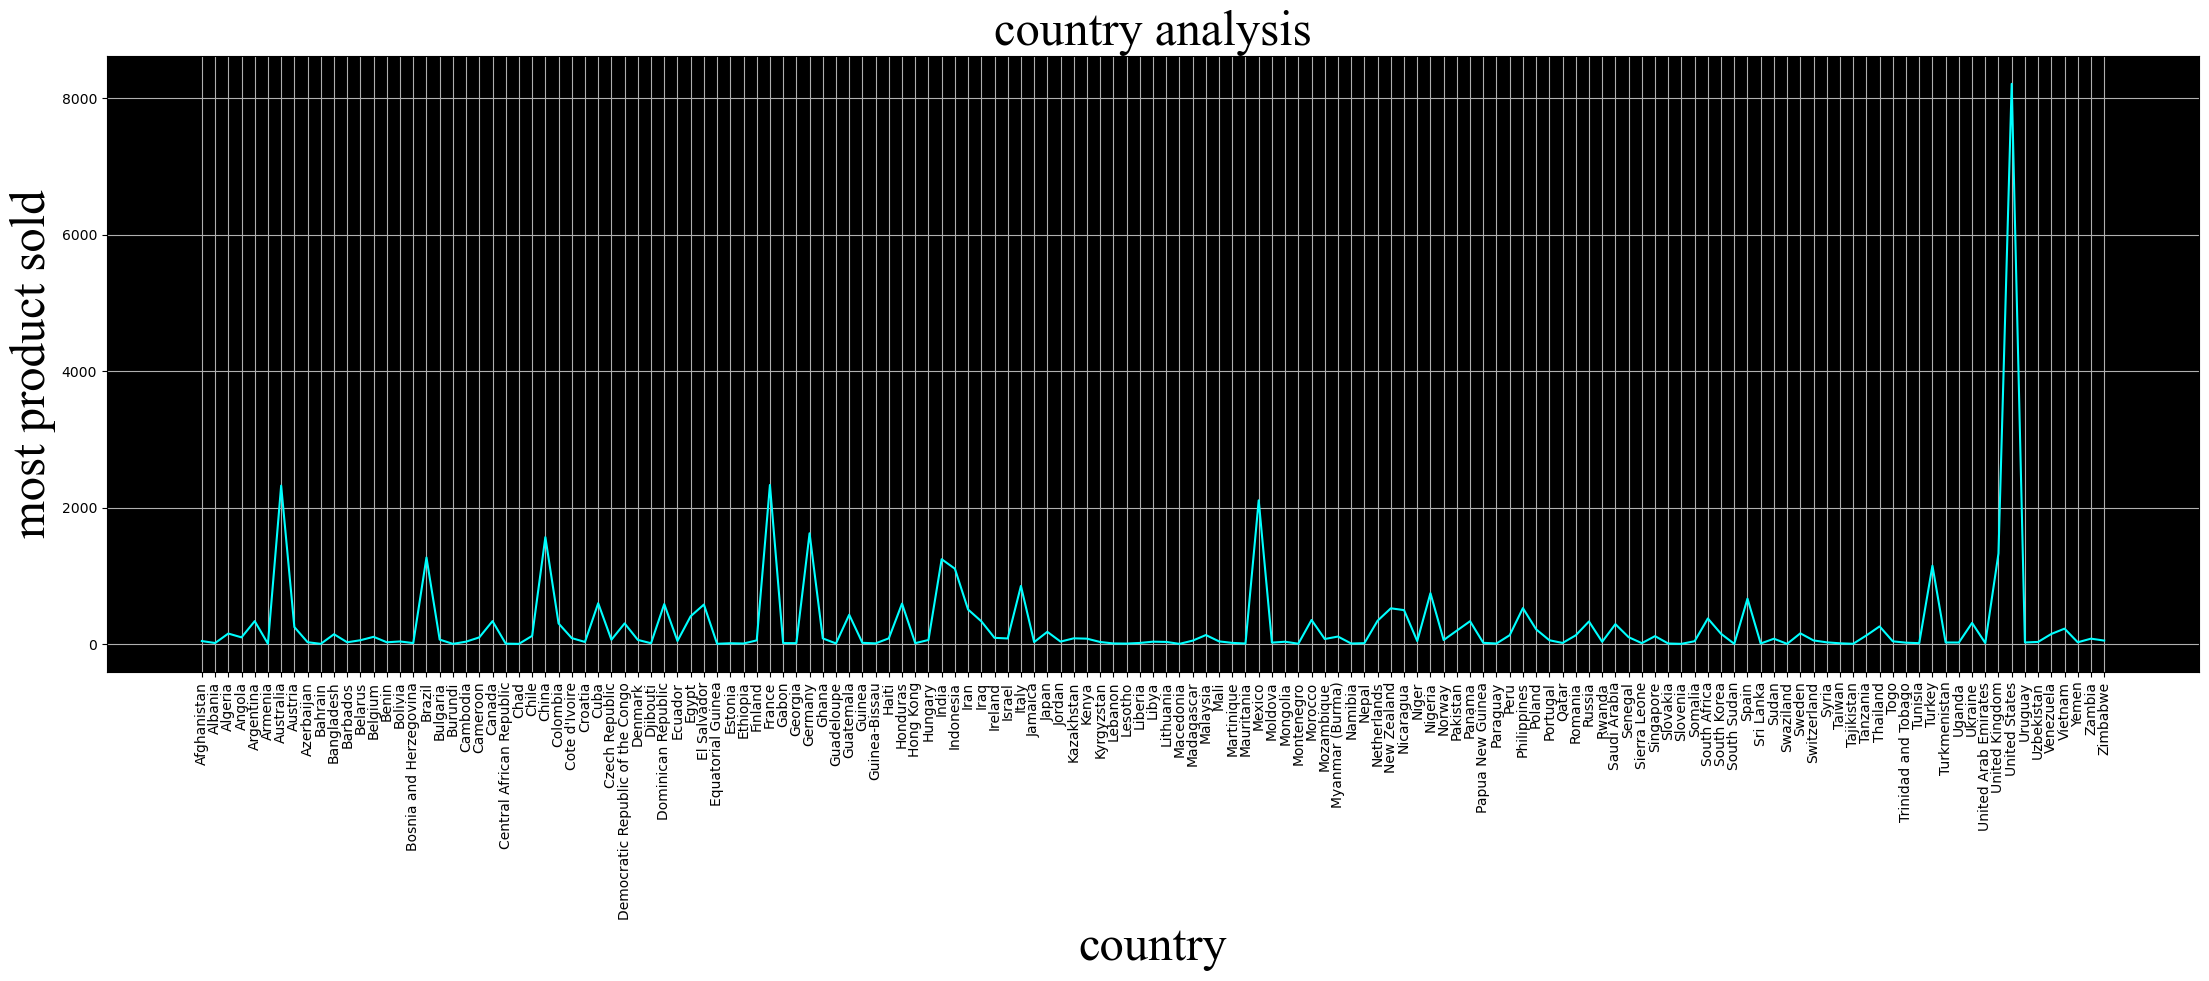

In [305]:
x = country.index
y = country.values
f = {'family':"times new roman",'size':35}
plt.figure(figsize= (27,8))
plt.title('country analysis',fontdict = f)
plt.xlabel('country',fontdict = f)
plt.ylabel('most product sold',fontdict = f)
plt.plot(x,y,color = 'cyan')
plt.xticks(rotation = 90);
plt.grid()
plt.gca().set_facecolor('k')
plt.show()

The United States has the highest sales among all countries, while countries like Zimbabwe record the lowest sales. This shows that most of the revenue come mainly from the United States compared to other countries.

2. Which category has the highest sales?

In [9]:
category = data.groupby('category',)['sales'].count()
category

category
Furniture           9876
Office Supplies    31273
Technology         10141
Name: sales, dtype: int64

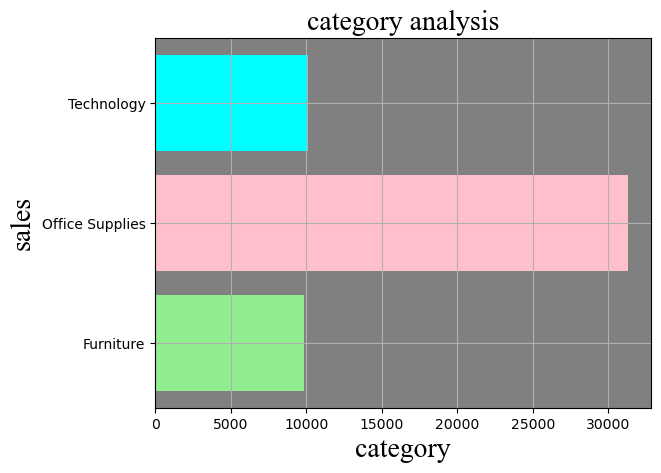

In [306]:
x= category.index
y = category.values
f = {'family':"times new roman",'size':20}
plt.title('category analysis',fontdict = f)
plt.xlabel('category',fontdict = f)
plt.ylabel('sales',fontdict = f)
plt.gca().set_facecolor('grey')
plt.barh(x,y,label =category.index,color = ['lightgreen','pink','cyan'])
plt.grid()

Office Supplies records the highest sales among all categories. Technology shows medium sales, while Furniture has the lowest sales. This indicates that Office Supplies contributes the most to overall revenue compared to other categories.

3. Which sub-category has the highest sales?

In [64]:
scategory = data.groupby('sub_category')['sales'].count()
scategory

sub_category
Accessories    2491
Appliances     1421
Art            3985
Binders        5035
Bookcases      1972
Chairs         2766
Copiers        1797
Envelopes      1979
Fasteners      1951
Furnishings    2557
Labels         2092
Machines       1185
Paper          2908
Phones         2745
Storage        4101
Supplies       1918
Tables          700
Name: sales, dtype: int64

C:\Users\MCHK\AppData\Local\Temp\ipykernel_22336\817087770.py:6: MatplotlibDeprecationWarning: Passing label as a length 17 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(x,y,'g--o',label =scategory.index)


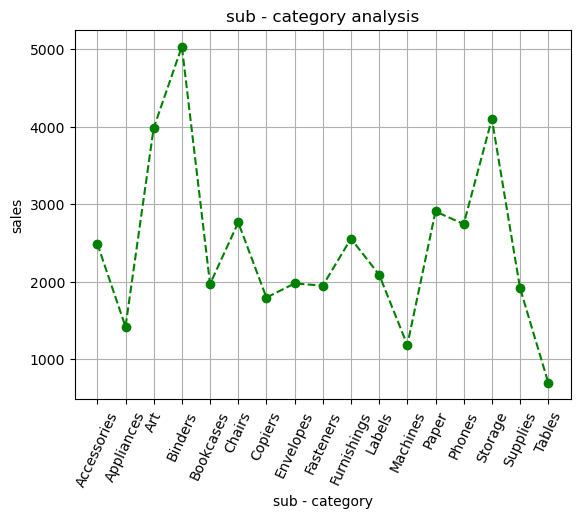

In [71]:
x= scategory.index
y= scategory.values
plt.title('sub - category analysis')
plt.xlabel('sub - category')
plt.ylabel('sales')
plt.plot(x,y,'g--o',label =scategory.index)
plt.xticks(rotation = 65)
plt.grid();

Binders records the highest sales among all sub-categories. Tables has the lowest sales. Phones and Storage also perform well, but Binders clearly contributes the most to overall sub-category sales.

4. Which customer segment has the highest percentage?

In [11]:
segment = data.groupby('segment').count()[['order_id']]
segment

,order_id
segment,
Consumer,26518
Corporate,15429
Home Office,9343


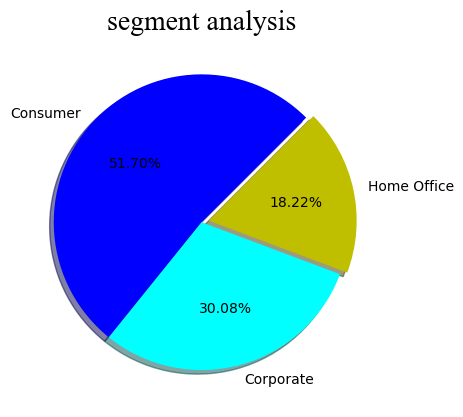

In [12]:
f = {'family':"times new roman",'size':20}
plt.title('segment analysis',fontdict = f)
plt.pie(segment['order_id'],startangle = 45,explode = [0,0,.05],autopct = '%1.2f%%',labels = segment.index,shadow = True,colors = ['b','cyan','y']);

Consumer has the highest share at 51.70%, while Home Office has the lowest share at 18.22%. Corporate stands in the middle with 30.08%. This shows that most sales come from the Consumer segment.

5. In which year was the profit turnover highest?

In [13]:
year = data.groupby('year')['profit'].max()
year

year
2011    4630.4755
2012    3177.4750
2013    8399.9760
2014    6719.9808
Name: profit, dtype: float64

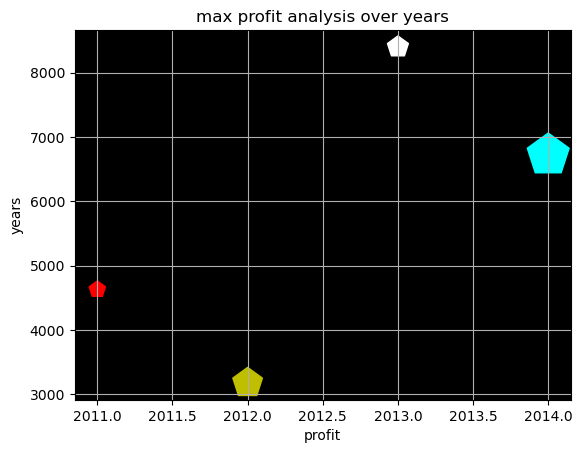

In [14]:
x= year.index
y= year.values
c = ['r','y','w','cyan']
s= [150,500,250,1000]
plt.gca().set_facecolor('k')
plt.scatter(x,y,color = c,sizes = s,marker = 'p')
plt.title('max profit analysis over years')
plt.xlabel('profit')
plt.ylabel('years');
plt.grid()

From the max profit analysis over the years, 2013 recorded the highest profit compared to other years. Profit increased from 2011 to 2013, then slightly decreased in 2014. Therefore, 2013 was the best-performing year in terms of maximum profit turnover.

6. Which order priority range has the highest percentage?

In [15]:
order_priority = data.groupby('order_priority').count()[['order_id']]
order_priority	

,order_id
order_priority,
Critical,3932
High,15501
Low,2424
Medium,29433


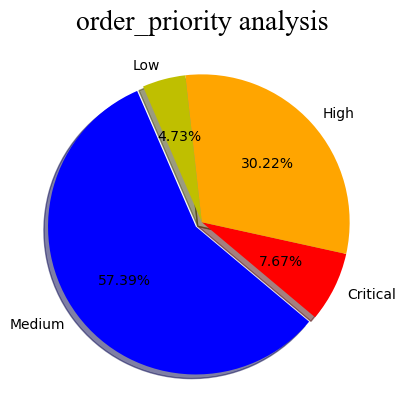

In [16]:
f = {'family':"times new roman",'size':20}
plt.title('order_priority analysis',fontdict = f)
plt.pie(order_priority['order_id'],startangle = 320,explode = [0,0,0,.05],autopct = '%1.2f%%',labels = order_priority.index,shadow = True,colors = ['r','orange','y','b']);

Medium priority orders have the highest percentage. Most customers prefer medium priority delivery, while high priority is second. Critical and low priority orders are comparatively fewer.

7. Which shipping mode has been used the most by customers?

In [17]:
ship_mode = data.groupby('ship_mode').count()[['order_id']]
ship_mode

,order_id
ship_mode,
First Class,7505
Same Day,2701
Second Class,10309
Standard Class,30775


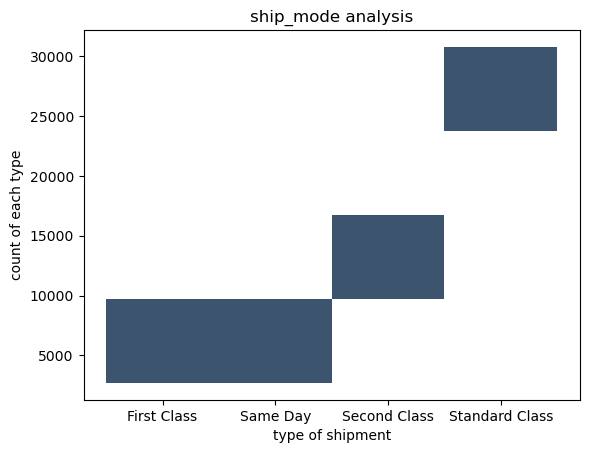

In [18]:
x = ship_mode.index
y = ship_mode['order_id']
sns.histplot(x=x,y=y,bins = 4,kde = True)
plt.title('ship_mode analysis')
plt.xlabel('type of shipment')
plt.ylabel('count of each type');

Standard Class shipping is used the most by customers. Second Class follows next, while First Class and Same Day shipping are used less frequently in the dataset.

8. Perform profit-over-time analysis for the given dataset.

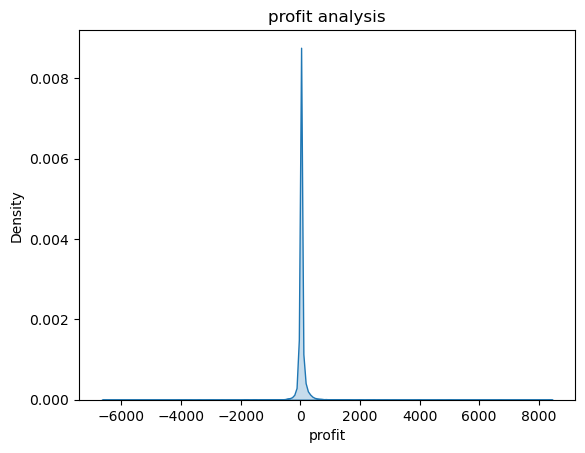

In [19]:
x = data['profit']
sns.kdeplot(x=x,fill = True);
plt.title('profit analysis');

Most orders make only small profit or no profit. A few orders give very high profit, and some cause big losses. Overall, profit values are mostly near zero.

9. Within how many days was the product shipped?
(Calculate the difference between Ship Date and Order Date.)

In [20]:
data['order_date'] = pd.to_datetime(data['order_date'],format = 'mixed',errors = 'coerce')
data

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.1400,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.0360,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.6400,8.17,High,2011
3,IT-2011-3647632,2011-01-01,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.0550,4.82,High,2011
4,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.7700,4.70,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,4/1/2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,2014-12-31,5/1/2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,2014-12-31,2/1/2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,2014-12-31,6/1/2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014


In [21]:
data['ship_date'] = pd.to_datetime(data['ship_date'],format = 'mixed',errors = 'coerce')
data

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.1400,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.0360,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-05-01,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.6400,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.0550,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.7700,4.70,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-04-01,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-05-01,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-02-01,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-06-01,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014


In [22]:
data['delivery_days'] = (data['ship_date'] - data['order_date']).dt.days
data

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,delivery_days
0,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408,2,0.0,106.1400,35.46,Medium,2011,151
1,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.0360,9.72,Medium,2011,212
2,HU-2011-1220,2011-01-01,2011-05-01,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66,4,0.0,29.6400,8.17,High,2011,120
3,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.0550,4.82,High,2011,120
4,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.7700,4.70,Medium,2011,212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-04-01,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014,91
51286,MO-2014-2560,2014-12-31,2015-05-01,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014,121
51287,MX-2014-110527,2014-12-31,2015-02-01,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014,32
51288,MX-2014-114783,2014-12-31,2015-06-01,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014,152


In [23]:
neg = data[data['delivery_days']<0]
update = data.drop(neg.index,inplace =True)

In [24]:
data

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,delivery_days
0,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408,2,0.0,106.1400,35.46,Medium,2011,151
1,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.0360,9.72,Medium,2011,212
2,HU-2011-1220,2011-01-01,2011-05-01,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66,4,0.0,29.6400,8.17,High,2011,120
3,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.0550,4.82,High,2011,120
4,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.7700,4.70,Medium,2011,212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-04-01,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014,91
51286,MO-2014-2560,2014-12-31,2015-05-01,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014,121
51287,MX-2014-110527,2014-12-31,2015-02-01,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014,32
51288,MX-2014-114783,2014-12-31,2015-06-01,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014,152


In [25]:
dd = data.groupby('delivery_days').count()[['order_id']]
dd

,order_id
delivery_days,
0,2600
1,895
2,4007
3,2635
4,7166
5,5459
6,2836
7,1344
28,71


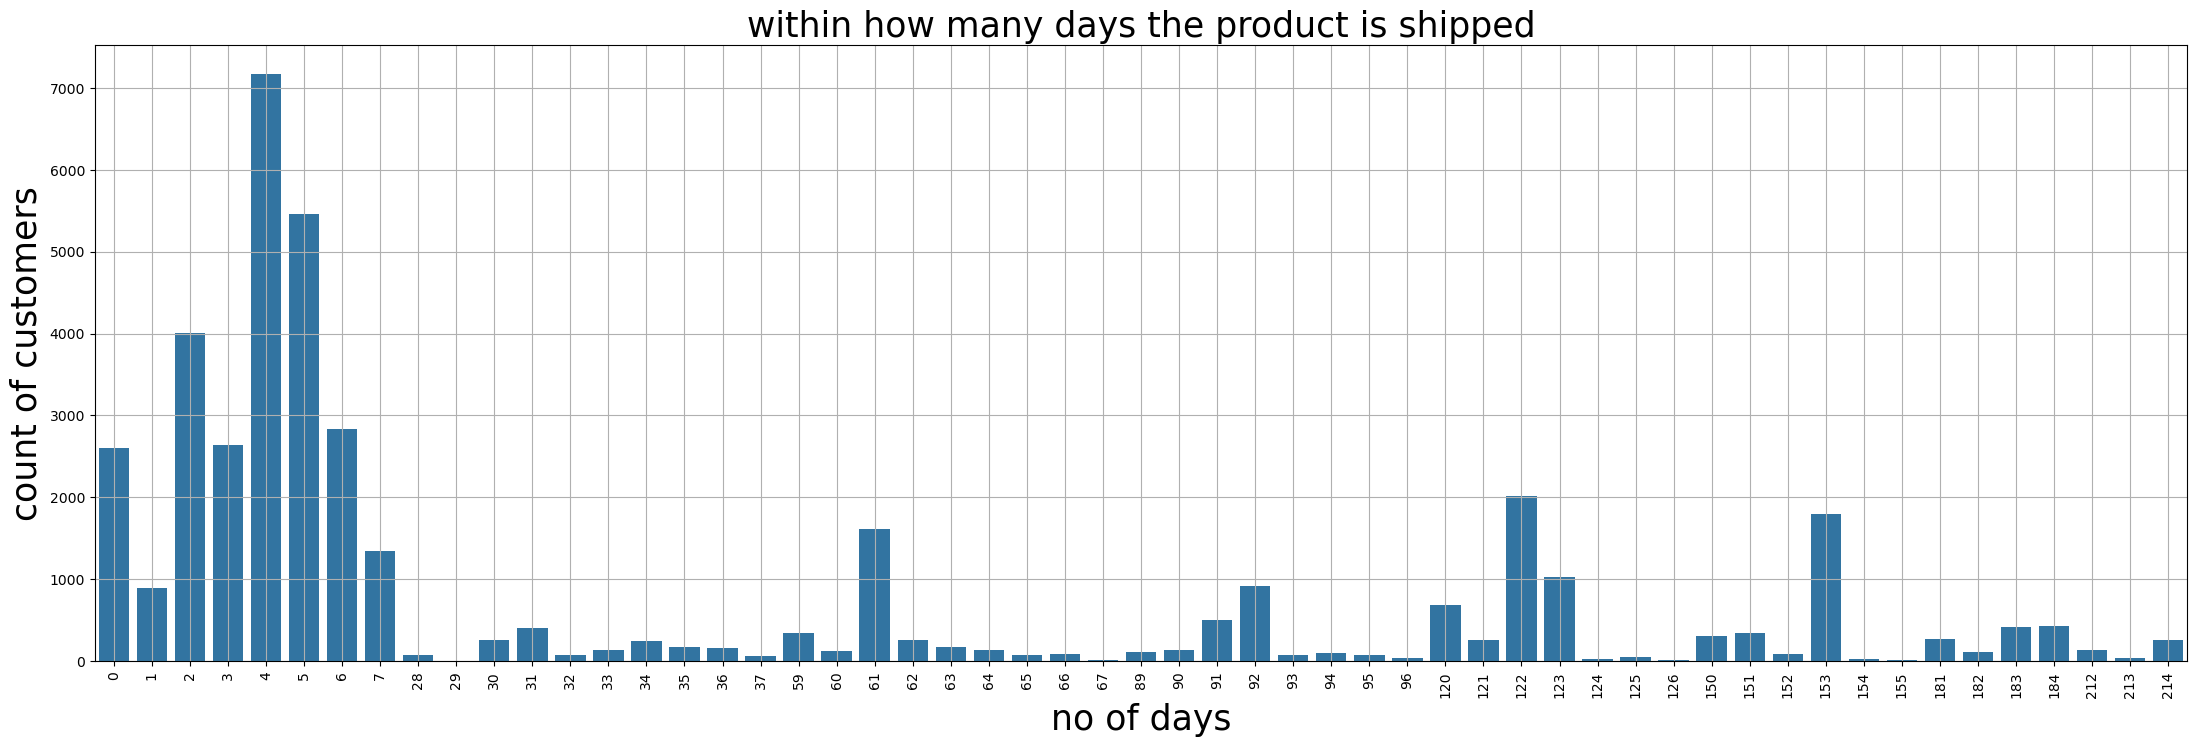

In [26]:
x = dd.index
y = dd['order_id']
plt.figure(figsize= (27,8))
f = {'size' : 25}
sns.barplot(x = x,y = y);
plt.title('within how many days the product is shipped',fontdict = f)
plt.xlabel('no of days',fontdict = f)
plt.ylabel('count of customers',fontdict = f)
plt.grid()
plt.xticks(rotation = 90);

Most products are shipped within a few days after ordering. The highest number of orders are delivered in shorter time periods, while very few orders take many days to ship. Overall, shipping is generally quick.

10. In which country is the shipping cost highest?

In [27]:
cost = data.groupby('country')['shipping_cost'].mean()
cost

country
Afghanistan    45.999302
Albania        33.252143
Algeria        18.307190
Angola         17.648454
Argentina      16.055373
                 ...    
Venezuela      14.312381
Vietnam        28.458667
Yemen          10.338400
Zambia         34.840769
Zimbabwe        5.975000
Name: shipping_cost, Length: 145, dtype: float64

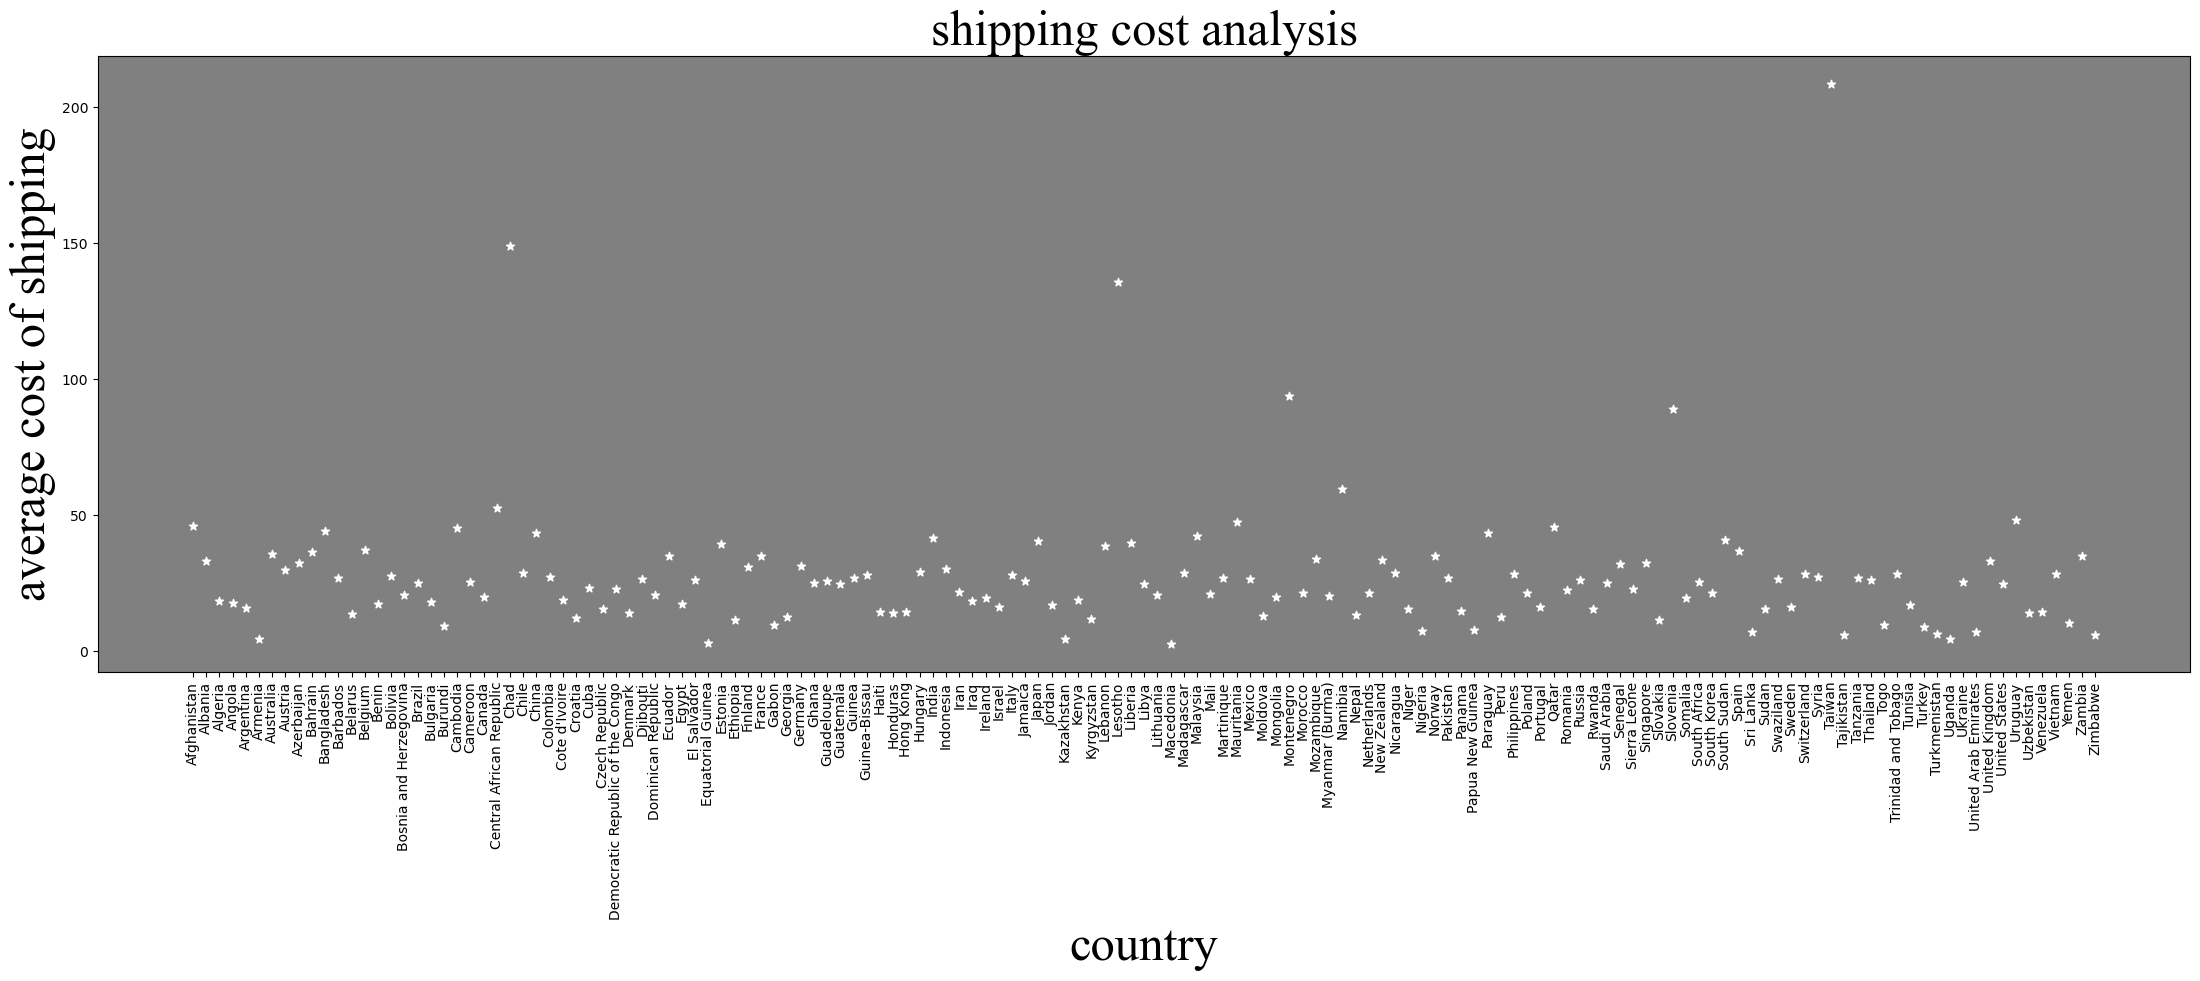

In [28]:
x = cost.index
y = cost.values
f = {'family':"times new roman",'size':35}
plt.figure(figsize= (27,8))
plt.title('shipping cost analysis',fontdict = f)
plt.xlabel('country',fontdict = f)
plt.ylabel('average cost of shipping',fontdict = f)
plt.scatter(x,y,color = 'w',marker = '*')
plt.xticks(rotation = 90);
plt.gca().set_facecolor('grey')

The shipping cost analysis shows that the United States has the highest average shipping cost, while countries like Burundi and Guinea-Bissau have the lowest shipping costs, indicating minimal delivery expenses in those regions.

11. Which year has the highest sales?

In [267]:
year = data.groupby('year').max()
year

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,delivery_days
year,,,,,,,,,,,,,,,,,,,,,
2011,ZI-2011-8150,2011-12-31,2012-07-01,Standard Class,Zuschuss Donatelli,Home Office,Zürich,Zimbabwe,US,West,...,Technology,Tables,netTALK DUO VoIP Telephone Service,999,14,0.80,4630.4755,894.77,Medium,214
2012,ZI-2012-7800,2012-12-31,2013-05-01,Standard Class,Zuschuss Donatelli,Home Office,Žilina,Zimbabwe,US,West,...,Technology,Tables,netTALK DUO VoIP Telephone Service,999,14,0.85,3177.4750,933.57,Medium,214
2013,ZI-2013-9260,2013-12-31,2014-07-01,Standard Class,Zuschuss Donatelli,Home Office,Zürich,Zimbabwe,US,West,...,Technology,Tables,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,998,14,0.80,8399.9760,923.63,Medium,214
2014,ZI-2014-9650,2014-12-31,2015-07-01,Standard Class,Zuschuss Donatelli,Home Office,Šiauliai,Zimbabwe,US,West,...,Technology,Tables,netTALK DUO VoIP Telephone Service,998,14,0.80,6719.9808,867.69,Medium,214


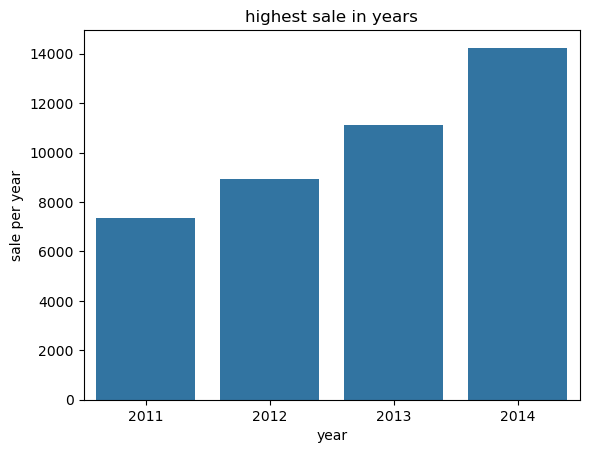

In [263]:
x = year.index
y= year['order_id']
sns.barplot(x=x,y=y)
plt.title('highest sale in years')
plt.xlabel('year')
plt.ylabel('sale per year');

The sales analysis shows that 2014 has the highest sales, while 2011 recorded the lowest sales. Sales increased steadily each year from 2011 to 2014.

12. The highest sales occurred in 2014. In which month were sales highest?

In [268]:
maxx = data[data['year'] == 2014]
maxx

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,delivery_days
33759,ES-2014-2774938,2014-01-01,2014-03-01,Second Class,Fred Harton,Consumer,Ile-de-France,France,EU,Central,...,Machines,"Okidata Printer, Red",677,3,0.15,-111.6225,104.69,High,2014,59
33760,IN-2014-47134,2014-01-01,2014-05-01,Standard Class,Kean Nguyen,Corporate,Victoria,Australia,APAC,Oceania,...,Machines,"Konica Inkjet, Wireless",846,3,0.10,46.9980,46.20,Medium,2014,120
33761,IT-2014-4810734,2014-01-01,2014-03-01,Second Class,Alan Shonely,Consumer,Ile-de-France,France,EU,Central,...,Phones,"Nokia Office Telephone, with Caller ID",332,6,0.15,-43.1370,37.85,Critical,2014,59
33762,US-2014-105830,2014-01-01,2014-03-01,First Class,Duane Benoit,Consumer,Ohio,United States,US,East,...,Storage,Tennsco Industrial Shelving,157,4,0.20,-35.2152,30.66,High,2014,59
33763,CA-2014-160395,2014-01-01,2014-07-01,Standard Class,Kelly Lampkin,Corporate,Nevada,United States,US,West,...,Binders,Lock-Up Easel 'Spel-Binder',160,7,0.20,53.9217,26.90,Low,2014,181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-04-01,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.20,4.5188,0.89,Medium,2014,91
51286,MO-2014-2560,2014-12-31,2015-05-01,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.00,0.4200,0.49,Medium,2014,121
51287,MX-2014-110527,2014-12-31,2015-02-01,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.00,12.3600,0.35,Medium,2014,32
51288,MX-2014-114783,2014-12-31,2015-06-01,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.00,0.5600,0.20,Medium,2014,152


In [269]:
month = maxx['order_date'].dt.month
month

33759     1
33760     1
33761     1
33762     1
33763     1
         ..
51285    12
51286    12
51287    12
51288    12
51289    12
Name: order_date, Length: 14243, dtype: int32

In [270]:
m = month.groupby(month.values).count()
m

1     1033
2      969
3     1268
4     1170
5     1124
6     1402
7      957
8     1295
9     1231
10    1136
11    1320
12    1338
Name: order_date, dtype: int64

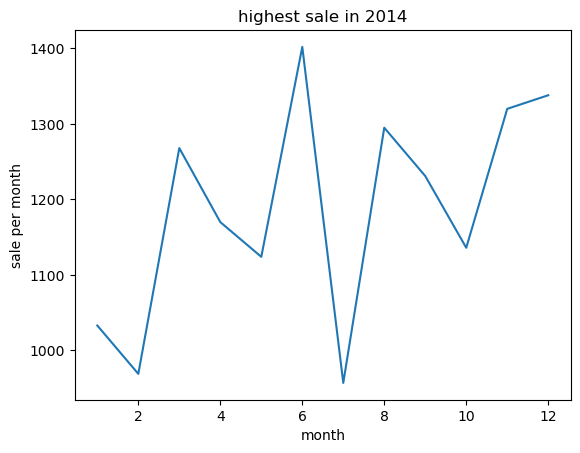

In [273]:
x = m.index
y= m.values
sns.lineplot(x=x,y=y)
plt.title('highest sale in 2014')
plt.xlabel('month')
plt.ylabel('sale per month');

In 2014, the highest sales occurred in June, while the lowest sales were seen in July. Sales fluctuated across months but peaked around mid-year.

13. In the United States, which state has the highest sales count?

In [33]:
country = data[data['country'] == 'United States']
country

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,delivery_days
38,CA-2011-103800,2011-04-01,2011-08-01,Standard Class,Darren Powers,Consumer,Texas,United States,US,Central,...,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16,2,0.2,5.5512,1.82,High,2011,122
46,CA-2011-112326,2011-05-01,2011-09-01,Standard Class,Phillina Ober,Home Office,Illinois,United States,US,Central,...,Storage,SAFCO Boltless Steel Shelving,273,3,0.2,-64.7748,13.59,High,2011,123
48,CA-2011-112326,2011-05-01,2011-09-01,Standard Class,Phillina Ober,Home Office,Illinois,United States,US,Central,...,Labels,Avery 508,12,3,0.2,4.2717,0.99,High,2011,123
49,CA-2011-112326,2011-05-01,2011-09-01,Standard Class,Phillina Ober,Home Office,Illinois,United States,US,Central,...,Binders,GBC Standard Plastic Binding Systems Combs,4,2,0.8,-5.4870,0.55,High,2011,123
58,CA-2011-167199,2011-07-01,2011-11-01,Standard Class,Maria Etezadi,Home Office,Kentucky,United States,US,South,...,Chairs,Global Deluxe High-Back Manager's Chair,"2,574",9,0.0,746.4078,258.99,High,2011,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51257,CA-2014-126221,2014-12-31,2015-06-01,Standard Class,Chuck Clark,Home Office,Indiana,United States,US,Central,...,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209,2,0.0,56.5110,8.32,Medium,2014,152
51260,CA-2014-143259,2014-12-31,2015-04-01,Standard Class,Patrick O'Donnell,Consumer,New York,United States,US,East,...,Binders,Wilson Jones Legal Size Ring Binders,53,3,0.2,19.7910,7.21,High,2014,91
51281,CA-2014-115427,2014-12-31,2015-04-01,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Binders,GBC Binding covers,21,2,0.2,6.4750,2.06,Medium,2014,91
51285,CA-2014-115427,2014-12-31,2015-04-01,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014,91


In [52]:
ss = country.groupby('state').count()[['country']]
ss

,country
state,
Alabama,50
Arizona,190
Arkansas,54
California,1659
Colorado,144
Connecticut,63
Delaware,78
District of Columbia,3
Florida,302


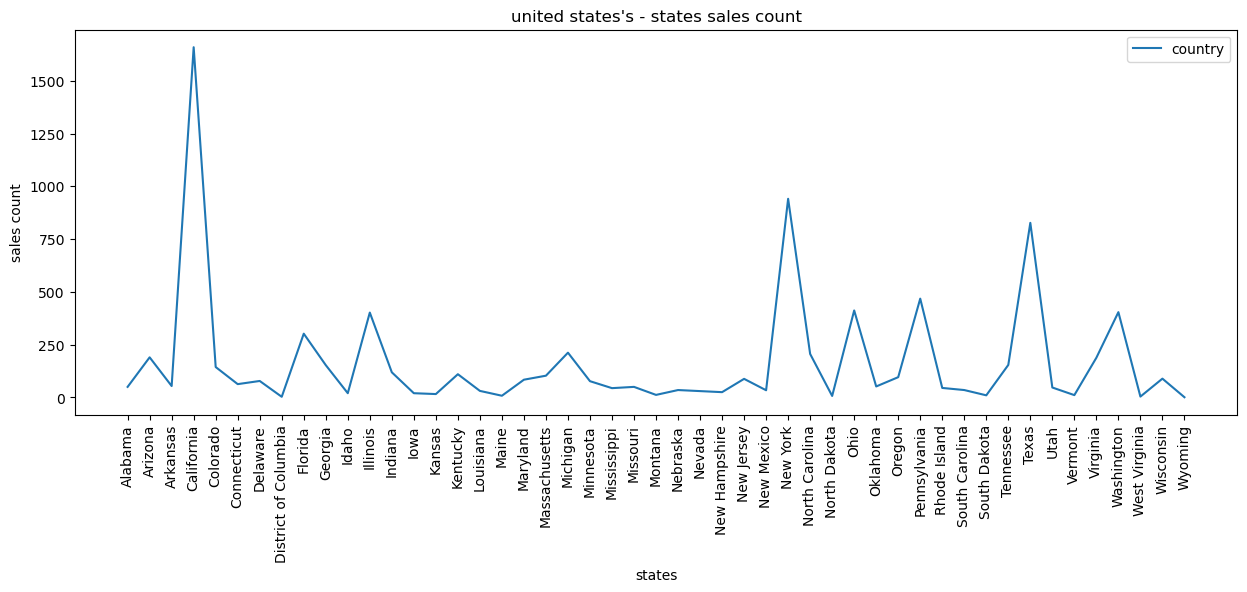

In [308]:
plt.figure(figsize= (15,5))
plt.title("united states's - states sales count")
plt.xlabel('states')
plt.ylabel('sales count')
plt.legend(labels = 'states')
sns.lineplot(ss)
f = {'size' : 25}
plt.xticks(rotation = 90);

The state-wise sales analysis shows that California records the highest sales count in the United States, indicating strong customer demand. In contrast, Wyoming has the lowest sales count, reflecting minimal sales activity. Other states fall between these two extremes with moderate sales performance.

14. In California, which category has the maximum profit?

In [36]:
state = data[data['state']=='California']
state

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,delivery_days
71,CA-2011-130813,2011-07-01,2011-09-01,Second Class,Lycoris Saunders,Consumer,California,United States,US,West,...,Paper,Xerox 225,19,3,0.00,9.3312,4.37,High,2011,62
173,CA-2011-157147,2011-01-14,2011-01-19,Standard Class,Brian Dahlen,Consumer,California,United States,US,West,...,Storage,Tennsco 6- and 18-Compartment Lockers,"1,326",5,0.00,238.6530,187.65,High,2011,5
179,CA-2011-157147,2011-01-14,2011-01-19,Standard Class,Brian Dahlen,Consumer,California,United States,US,West,...,Bookcases,"O'Sullivan Elevations Bookcase, Cherry Finish",334,3,0.15,3.9294,40.44,High,2011,5
193,CA-2011-157147,2011-01-14,2011-01-19,Standard Class,Brian Dahlen,Consumer,California,United States,US,West,...,Art,4009 Highlighters by Sanford,20,5,0.00,6.5670,3.03,High,2011,5
283,CA-2011-148614,2011-01-21,2011-01-26,Standard Class,Mark Van Huff,Consumer,California,United States,US,West,...,Paper,"Wirebound Service Call Books, 5 1/2"" x 4""",19,2,0.00,9.2928,0.94,Medium,2011,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51168,CA-2014-118885,2014-12-30,2015-03-01,Standard Class,James Galang,Consumer,California,United States,US,West,...,Phones,Adtran 1202752G1,302,3,0.20,22.6782,26.69,Medium,2014,61
51183,CA-2014-146626,2014-12-30,2015-06-01,Standard Class,Ben Peterman,Corporate,California,United States,US,West,...,Furnishings,Nu-Dell Executive Frame,101,8,0.00,37.4144,11.07,Low,2014,153
51203,CA-2014-118885,2014-12-30,2015-03-01,Standard Class,James Galang,Consumer,California,United States,US,West,...,Chairs,"Global High-Back Leather Tilter, Burgundy",394,4,0.20,-44.2764,3.37,Medium,2014,61
51281,CA-2014-115427,2014-12-31,2015-04-01,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Binders,GBC Binding covers,21,2,0.20,6.4750,2.06,Medium,2014,91


In [41]:
s = state.groupby('category')['profit'].max()
s

category
Furniture           272.7920
Office Supplies    1906.4850
Technology         1007.9832
Name: profit, dtype: float64

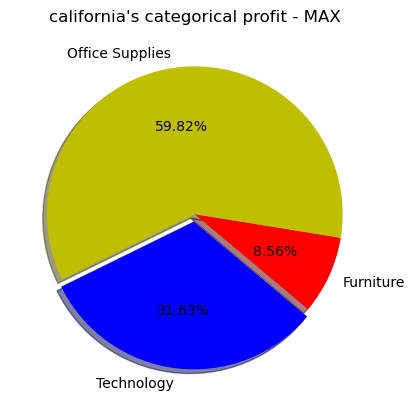

In [49]:
plt.title("california's categorical profit - MAX" )
plt.pie(s,startangle = 320,explode = [0,0,.05],autopct = '%1.2f%%',labels = s.index,shadow = True,colors = ['r','y','b']);

In California, Office Supplies generate the highest profit, contributing the largest share among categories. Technology follows as the second highest profit category, while Furniture records the lowest profit, indicating weaker performance compared to the other categories in the state.

15. In California, which sub-category has the maximum profit?

In [97]:
us = state.groupby('sub_category')['profit'].max()
us

sub_category
Accessories     659.9800
Appliances      654.7554
Art              55.9120
Binders        1906.4850
Bookcases       225.7350
Chairs          267.6672
Copiers        1007.9832
Envelopes       197.3530
Fasteners        21.5824
Furnishings     272.7920
Labels          126.3942
Machines        503.6400
Paper           352.2960
Phones          363.9048
Storage         334.1142
Supplies        327.5060
Tables          180.4410
Name: profit, dtype: float64

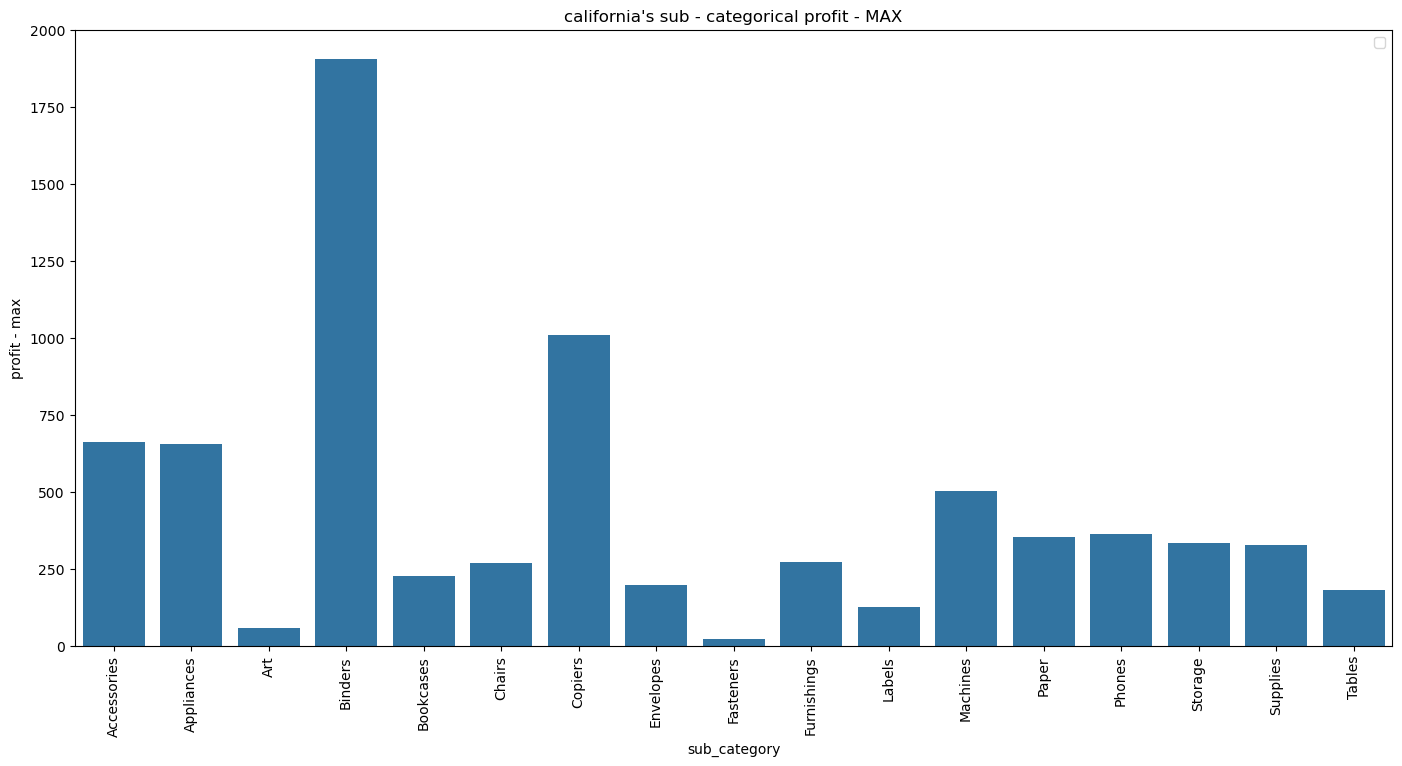

In [98]:
plt.figure(figsize= (17,8))
plt.title("california's sub - categorical profit - MAX")
plt.xlabel('sub_category')
plt.ylabel('profit - max')
plt.legend(labels = 'states')
sns.barplot(x = us.index,y = us.values)
plt.xticks(rotation = 90);

Binders record the highest profit, making them the best-performing item. In contrast, Fasteners have the lowest profit, showing very weak performance. Other sub-categories earn moderate profits compared to these two extremes.

16. What are the products sold under the sub-category Binders in California?

In [99]:
sc = state[state['sub_category'] =='Binders']
sc

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,delivery_days
497,CA-2011-104808,2011-05-02,2011-09-02,Second Class,Mark Haberlin,Corporate,California,United States,US,West,...,Binders,"GBC Standard Recycled Report Covers, Clear Pla...",17,2,0.2,6.0368,3.37,High,2011,123
499,CA-2011-107181,2011-05-02,2011-09-02,Standard Class,Deborah Brumfield,Home Office,California,United States,US,West,...,Binders,GBC Recycled Grain Textured Covers,83,3,0.2,29.0136,2.55,High,2011,123
1246,CA-2011-141838,2011-03-26,2011-03-31,Second Class,Damala Kotsonis,Corporate,California,United States,US,West,...,Binders,Wilson Jones Leather-Like Binders with DublLoc...,28,4,0.2,9.4284,3.34,High,2011,5
1327,CA-2011-128055,2011-03-31,2011-05-04,Standard Class,Alex Avila,Consumer,California,United States,US,West,...,Binders,GBC DocuBind 200 Manual Binding Machine,674,2,0.2,252.5880,54.96,Medium,2011,34
1371,US-2011-157021,2011-01-04,2011-06-04,Second Class,Kunst Miller,Consumer,California,United States,US,West,...,Binders,"Pressboard Data Binder, Crimson, 12"" X 8 1/2""",17,4,0.2,5.5536,0.65,Medium,2011,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50540,CA-2014-128160,2014-12-20,2014-12-25,Second Class,Michael Moore,Consumer,California,United States,US,West,...,Binders,Deluxe Heavy-Duty Vinyl Round Ring Binder,37,2,0.2,11.4600,3.08,Medium,2014,5
50806,CA-2014-145219,2014-12-25,2014-12-26,First Class,Robert Marley,Home Office,California,United States,US,West,...,Binders,Vinyl Sectional Post Binders,90,3,0.2,33.9300,15.95,Critical,2014,1
50908,CA-2014-121398,2014-12-26,2014-12-30,Standard Class,Fred Hopkins,Corporate,California,United States,US,West,...,Binders,GBC DocuBind P50 Personal Binding Machine,154,3,0.2,51.8238,9.59,Medium,2014,4
51281,CA-2014-115427,2014-12-31,2015-04-01,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Binders,GBC Binding covers,21,2,0.2,6.4750,2.06,Medium,2014,91


In [84]:
product = sc.groupby('product_name').count()[['order_id']]
product

,order_id
product_name,
"ACCOHIDE 3-Ring Binder, Blue, 1""",3
ACCOHIDE Binder by Acco,1
Acco 3-Hole Punch,1
"Acco Data Flex Cable Posts For Top & Bottom Load Binders, 6"" Capacity",2
Acco Economy Flexible Poly Round Ring Binder,1
...,...
Wilson Jones Standard D-Ring Binders,1
Wilson Jones Turn Tabs Binder Tool for Ring Binders,1
Wilson Jones data.warehouse D-Ring Binders with DublLock,1


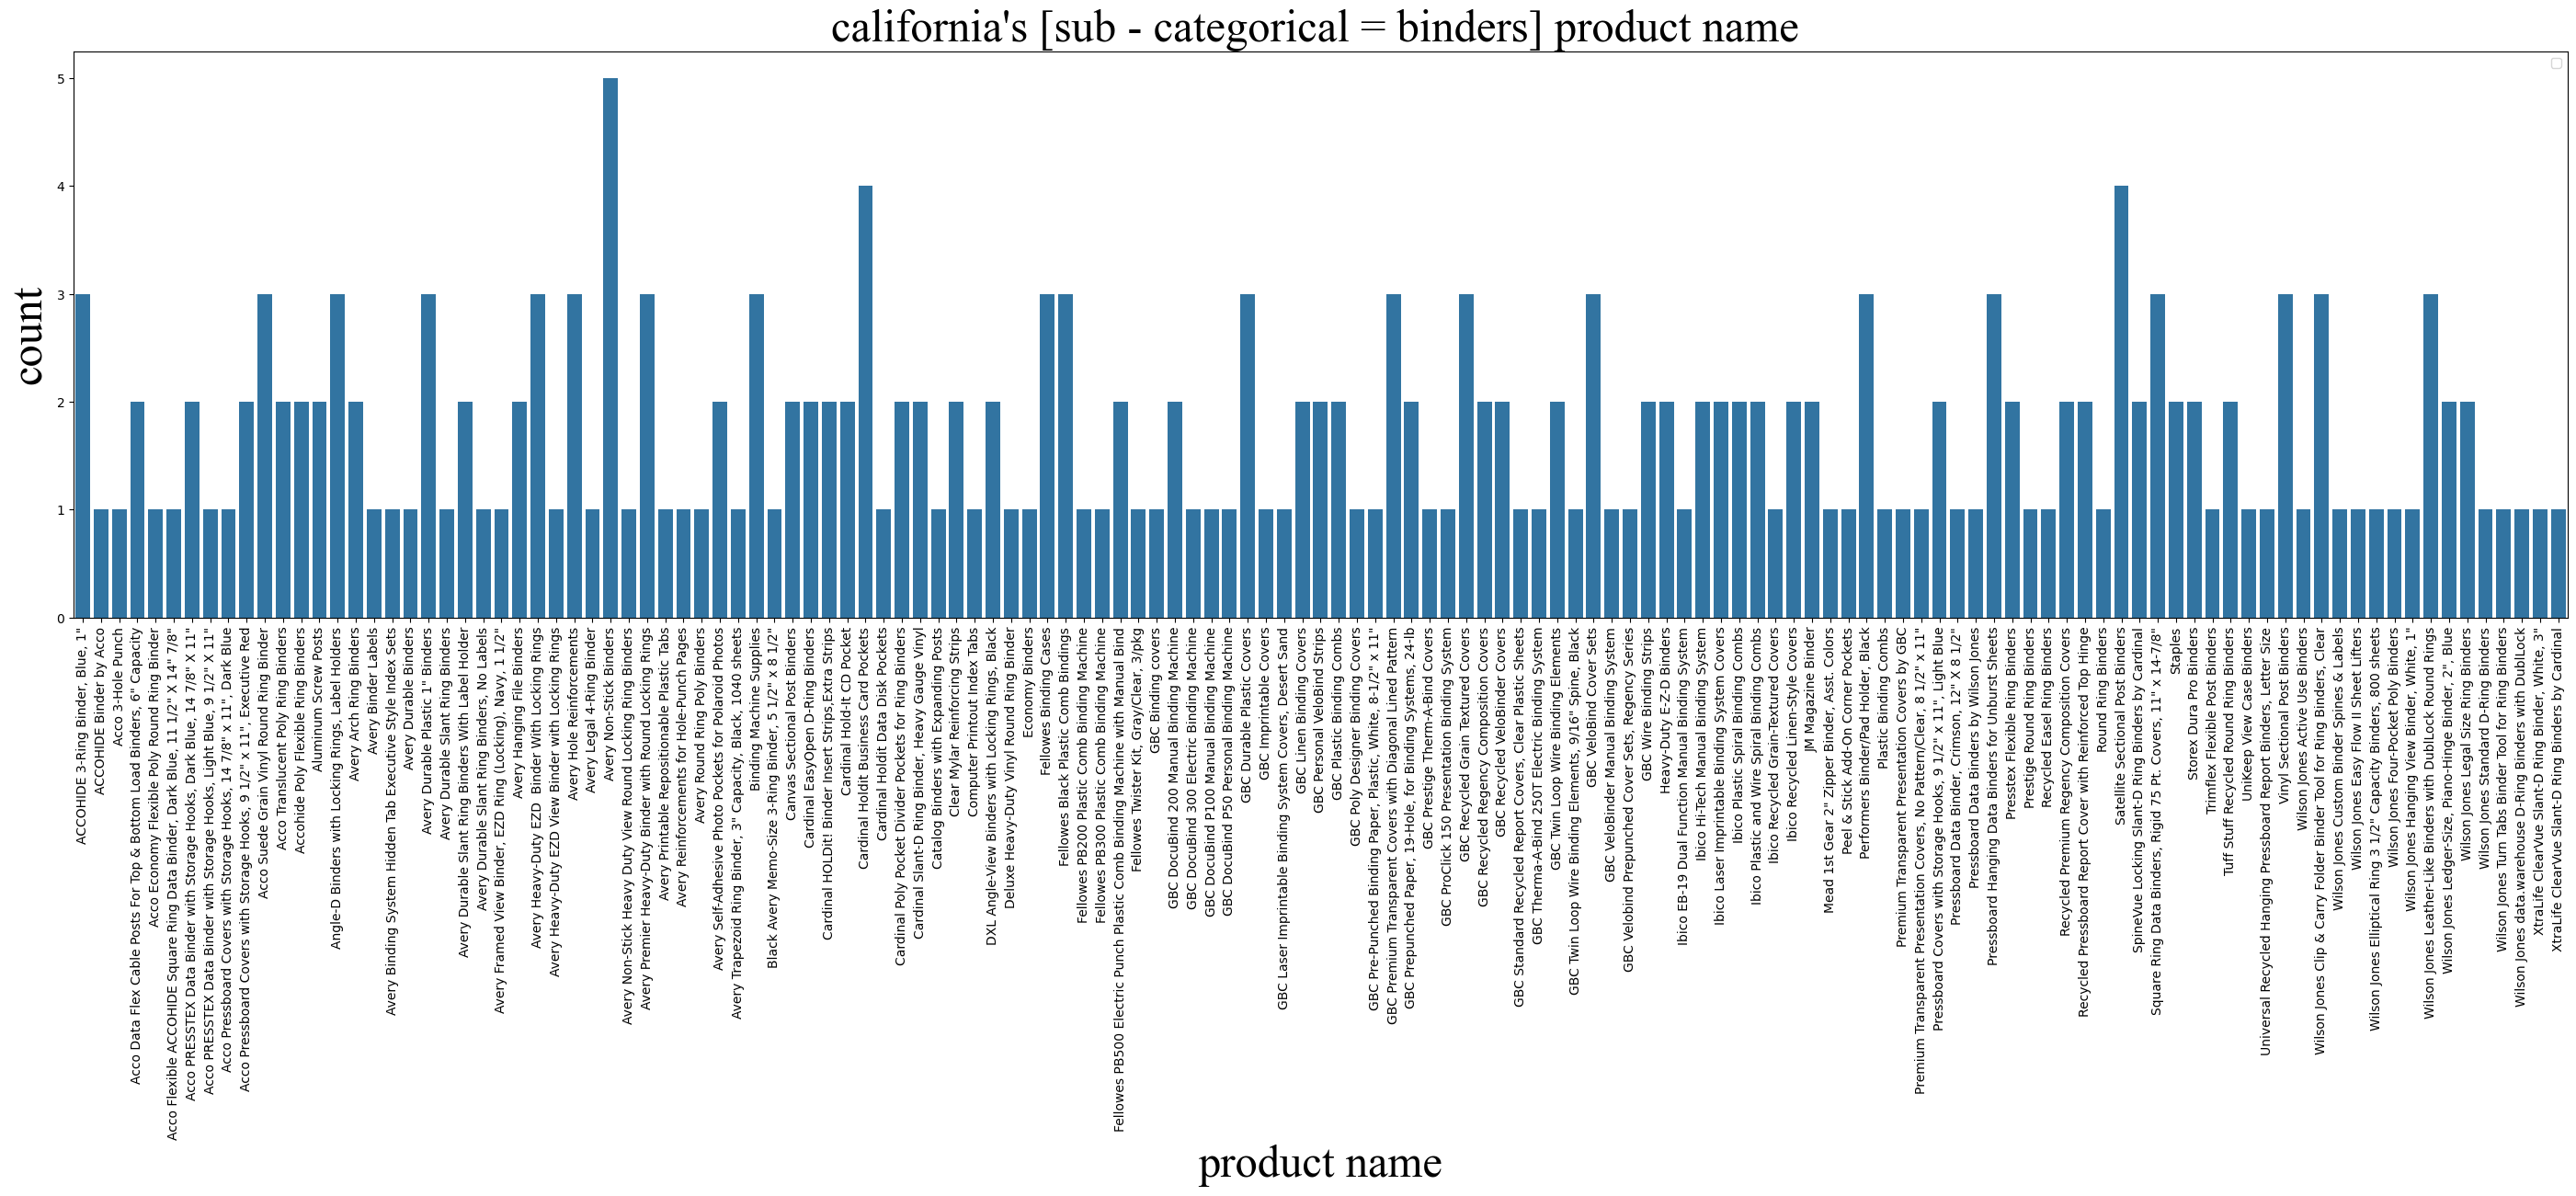

In [95]:
plt.figure(figsize= (35,8))
f = {'family':"times new roman",'size':35}
plt.title("california's [sub - categorical = binders] product name ",fontdict = f)
plt.xlabel('product name',fontdict = f)
plt.ylabel('count',fontdict = f)
plt.legend(labels = 'states')
sns.barplot(x = product.index,y = product['order_id'])
plt.xticks(rotation = 90);

Wilson Jones Legal Size Ring Binders record the highest sales, making them the most popular product in California under the Binders sub-category. In contrast, Acco Pressboard Covers with Storage Hooks have the lowest sales, showing very low demand. Other binder products have moderate sales compared to these two extremes.

17. What are the products sold under the sub-category Fasteners in California?

In [101]:
lowest = state[state['sub_category'] =='Fasteners']
lowest

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,delivery_days
483,CA-2011-139857,2011-03-02,2011-07-02,Standard Class,Cynthia Delaney,Home Office,California,United States,US,West,...,Fasteners,Staples,12,5,0.0,5.8045,0.29,Medium,2011,122
1677,CA-2011-110849,2011-04-18,2011-04-23,Standard Class,John Lee,Consumer,California,United States,US,West,...,Fasteners,"Advantus Push Pins, Aluminum Head",12,2,0.0,3.6022,0.96,High,2011,5
5038,CA-2011-168592,2011-08-09,2011-09-14,Standard Class,Dennis Pardue,Home Office,California,United States,US,West,...,Fasteners,Ideal Clamps,4,2,0.0,1.9698,0.29,Medium,2011,36
5394,CA-2011-159849,2011-09-19,2011-09-19,Same Day,Jim Kriz,Home Office,California,United States,US,West,...,Fasteners,Revere Boxed Rubber Bands by Revere,6,3,0.0,0.1134,0.67,High,2011,0
5395,CA-2011-156601,2011-09-19,2011-09-24,Standard Class,Frank Atkinson,Corporate,California,United States,US,West,...,Fasteners,OIC Binder Clips,7,2,0.0,3.5800,0.17,Medium,2011,5
7888,CA-2011-133830,2011-05-12,2011-10-12,Standard Class,Rob Lucas,Consumer,California,United States,US,West,...,Fasteners,Advantus Plastic Paper Clips,15,3,0.0,7.2000,1.15,Medium,2011,153
8418,CA-2011-162992,2011-12-19,2011-12-21,First Class,Bart Pistole,Corporate,California,United States,US,West,...,Fasteners,Advantus T-Pin Paper Clips,23,5,0.0,8.7945,2.33,Medium,2011,2
8814,CA-2011-166961,2011-12-27,2011-12-31,Standard Class,Cynthia Delaney,Home Office,California,United States,US,West,...,Fasteners,Staples,8,3,0.0,3.6156,0.30,Medium,2011,4
10340,CA-2012-149993,2012-03-19,2012-03-20,First Class,Guy Armstrong,Consumer,California,United States,US,West,...,Fasteners,Stockwell Push Pins,11,5,0.0,3.5970,2.63,High,2012,1
13010,CA-2012-139164,2012-06-23,2012-06-28,Standard Class,Christine Sundaresam,Consumer,California,United States,US,West,...,Fasteners,Assorted Color Push Pins,5,3,0.0,1.7919,0.34,Medium,2012,5


In [102]:
fproduct = lowest.groupby('product_name').count()[['order_id']]
fproduct

,order_id
product_name,
"Acco Banker's Clasps, 5 3/4""-Long",1
"Acco Clips to Go Binder Clips, 24 Clips in Two Sizes",1
Advantus Map Pennant Flags and Round Head Tacks,1
Advantus Plastic Paper Clips,2
Advantus Push Pins,1
"Advantus Push Pins, Aluminum Head",1
Advantus SlideClip Paper Clips,1
Advantus T-Pin Paper Clips,2
"Alliance Big Bands Rubber Bands, 12/Pack",1


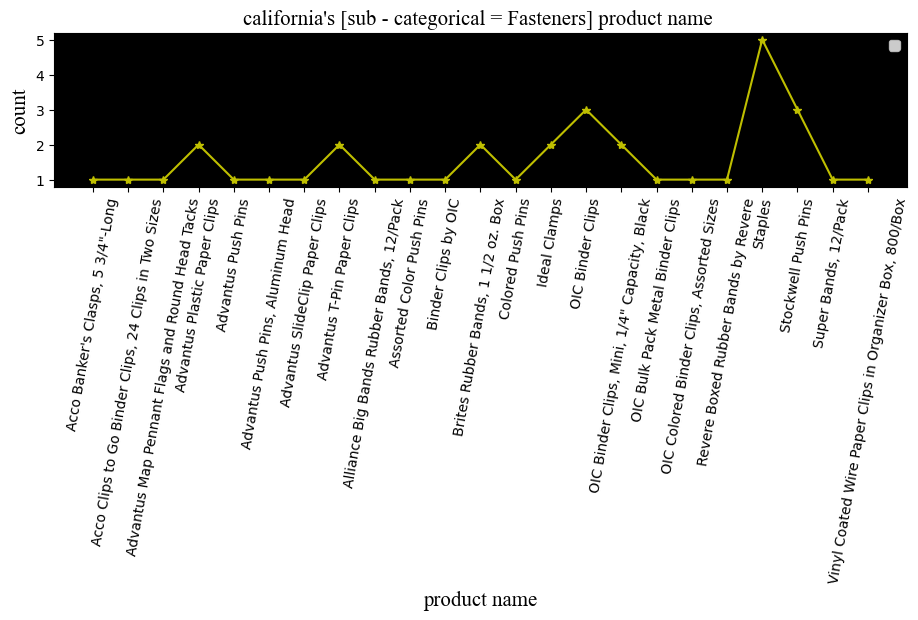

In [311]:
plt.figure(figsize= (11,2))
plt.gca().set_facecolor('k')
f = {'family':"times new roman",'size':15}
plt.title("california's [sub - categorical = Fasteners] product name ",fontdict = f)
plt.xlabel('product name',fontdict = f)
plt.ylabel('count',fontdict = f)
plt.legend(labels = 'states')
plt.plot(fproduct.index,fproduct['order_id'],marker = '*',color = 'y')
plt.xticks(rotation = 80);

Staples record the highest sales, making them the most sold product in the Fasteners sub-category. In contrast, Acco Banker's Clasps,show the lowest sales, indicating very low customer demand. Other fastener products have moderate sales compared to these two extremes.

18. Perform quantity–profit analysis.

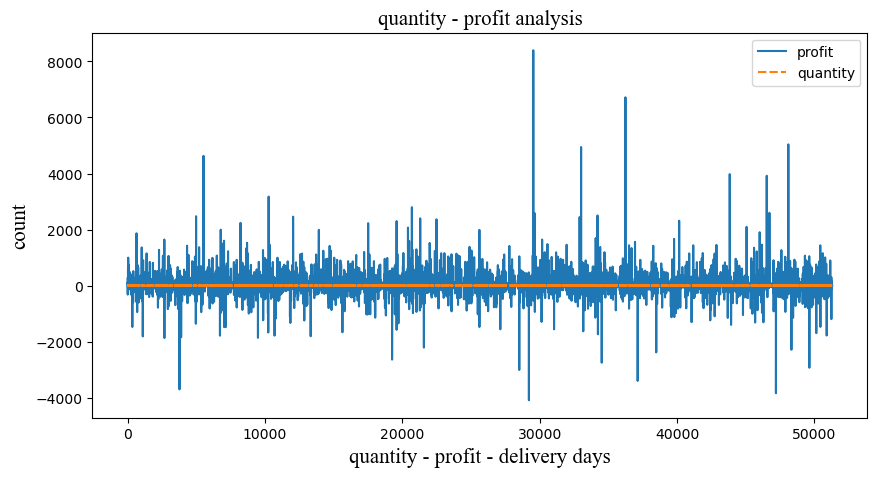

In [286]:
plt.figure(figsize= (10,5))
f = {'family':"times new roman",'size':15}
plt.title("quantity - profit analysis",fontdict = f)
plt.xlabel('quantity - profit - delivery days',fontdict = f)
plt.ylabel('count',fontdict = f)
pair = data[['profit','quantity']]
sns.lineplot(pair);

The graph shows the relationship between quantity and profit. Most profit values stay near the center, meaning profit does not strongly increase with higher quantity. Some sales show very high profit and some show losses. This indicates a weak relationship, where selling more items does not always guarantee higher profit.

19. Find the correlation between the numerical variables in the dataset.

In [172]:
num = data.select_dtypes(include = ['number'])
num

,quantity,discount,profit,shipping_cost,year,delivery_days
0,2,0.0,106.1400,35.46,2011,151
1,3,0.1,36.0360,9.72,2011,212
2,4,0.0,29.6400,8.17,2011,120
3,3,0.5,-26.0550,4.82,2011,120
4,5,0.1,37.7700,4.70,2011,212
...,...,...,...,...,...,...
51285,2,0.2,4.5188,0.89,2014,91
51286,1,0.0,0.4200,0.49,2014,121
51287,3,0.0,12.3600,0.35,2014,32
51288,1,0.0,0.5600,0.20,2014,152


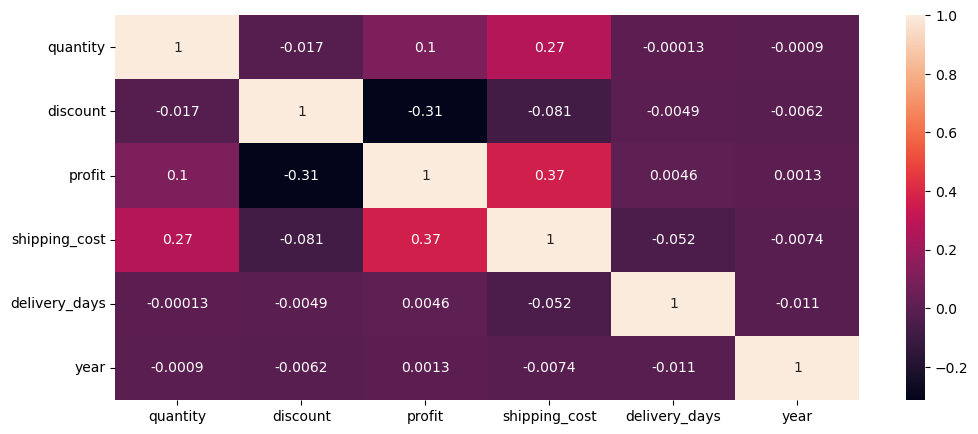

In [175]:
plt.figure(figsize= (12,5))
heatmap = data[['quantity','discount','profit','shipping_cost','delivery_days','year']]
hm = heatmap.corr()
sns.heatmap(hm,annot = True);

The heatmap shows relationships between numerical variables. Profit and shipping cost have a moderate positive correlation (0.37), meaning they increase together. Discount and profit have a negative correlation (-0.31), showing higher discounts reduce profit. Other variables like quantity, delivery days, and year have very weak correlations close to zero.

20. Identify the outliers in the dataset.

In [139]:
data.describe()

,order_date,ship_date,quantity,discount,profit,shipping_cost,year,delivery_days
count,41603,41603,41603.000000,41603.000000,41603.000000,41603.000000,41603.000000,41603.000000
mean,2013-04-17 02:33:36.719948032,2013-05-28 02:22:01.000889600,3.472346,0.143623,29.016453,27.072233,2012.775257,40.991948
min,2011-01-01 00:00:00,2011-01-03 00:00:00,1.000000,0.000000,-4088.376000,0.000000,2011.000000,0.000000
25%,2012-05-14 00:00:00,2012-07-07 12:00:00,2.000000,0.000000,0.000000,2.660000,2012.000000,4.000000
50%,2013-06-11 00:00:00,2013-08-02 00:00:00,3.000000,0.000000,9.120000,7.960000,2013.000000,5.000000
75%,2014-04-12 00:00:00,2014-06-12 00:00:00,5.000000,0.200000,36.635000,25.090000,2014.000000,65.000000
max,2014-12-31 00:00:00,2015-07-01 00:00:00,14.000000,0.850000,8399.976000,933.570000,2014.000000,214.000000
std,NaN,NaN,2.273883,0.212539,176.133153,58.744228,1.100833,57.924303


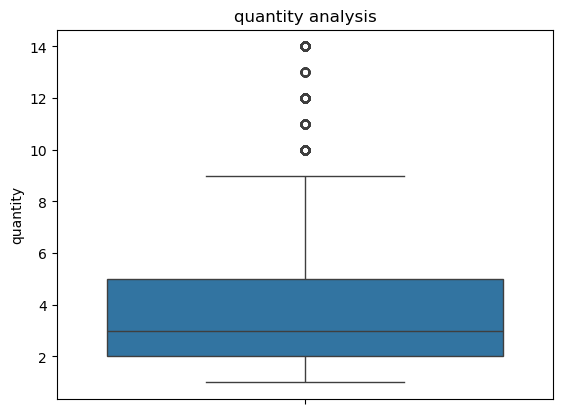

In [233]:
plt.title('quantity analysis')
sns.boxplot(y= data['quantity']);

In [234]:
q1 = data['quantity'].quantile(0.25)
q3 = data['quantity'].quantile(0.75)
iqr = q3 - q1
print(q1)
print(q3)
print(iqr)

2.0
5.0
3.0


In [235]:
lb = q1-1.5*iqr
ub = q1+1.5*iqr
print(lb)
print(ub)

-2.5
6.5


In [236]:
data[(data['quantity']<lb) | (data['quantity']>ub)]

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,delivery_days
12,ES-2011-4869686,2011-03-01,2011-07-01,Standard Class,Dorothy Dickinson,Consumer,England,United Kingdom,EU,North,...,Bookcases,"Dania Corner Shelving, Traditional",854,7,0.00,290.4300,12.56,Medium,2011,122
31,MX-2011-111255,2011-04-01,2011-09-01,Second Class,Russell Applegate,Consumer,Parana,Brazil,LATAM,South,...,Supplies,"Fiskars Letter Opener, Easy Grip",149,8,0.00,28.1600,10.38,Medium,2011,153
43,MX-2011-109267,2011-05-01,2011-09-01,Standard Class,Jennifer Halladay,Consumer,Veracruz,Mexico,LATAM,North,...,Appliances,"Hoover Stove, Black","3,029",8,0.00,999.3600,191.20,Medium,2011,123
53,IN-2011-29963,2011-06-01,2011-10-01,Standard Class,Brosina Hoffman,Consumer,Sumatera Barat,Indonesia,APAC,Southeast Asia,...,Fasteners,"Advantus Staples, Metal",41,7,0.47,-27.0942,2.63,High,2011,122
58,CA-2011-167199,2011-07-01,2011-11-01,Standard Class,Maria Etezadi,Home Office,Kentucky,United States,US,South,...,Chairs,Global Deluxe High-Back Manager's Chair,"2,574",9,0.00,746.4078,258.99,High,2011,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51231,IN-2014-30390,2014-12-31,2015-03-01,First Class,Justin Deggeller,Corporate,Bangkok,Thailand,APAC,Southeast Asia,...,Tables,"Lesro Training Table, Adjustable Height","1,049",9,0.57,-1195.2387,86.86,High,2014,60
51237,IN-2014-75603,2014-12-31,2015-05-01,Second Class,Bill Shonely,Corporate,Andhra Pradesh,India,APAC,Central Asia,...,Supplies,"Kleencut Letter Opener, Easy Grip",258,9,0.00,92.8800,46.11,Medium,2014,121
51256,CA-2014-143259,2014-12-31,2015-04-01,Standard Class,Patrick O'Donnell,Consumer,New York,United States,US,East,...,Phones,Gear Head AU3700S Headset,91,7,0.00,2.7279,9.67,High,2014,91
51258,UP-2014-3330,2014-12-31,2015-02-01,First Class,Fred Wasserman,Corporate,Mykolayiv,Ukraine,EMEA,EMEA,...,Fasteners,"OIC Thumb Tacks, Assorted Sizes",138,12,0.00,55.0800,8.03,Medium,2014,32


In [237]:
data[data['quantity']<lb]

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,delivery_days


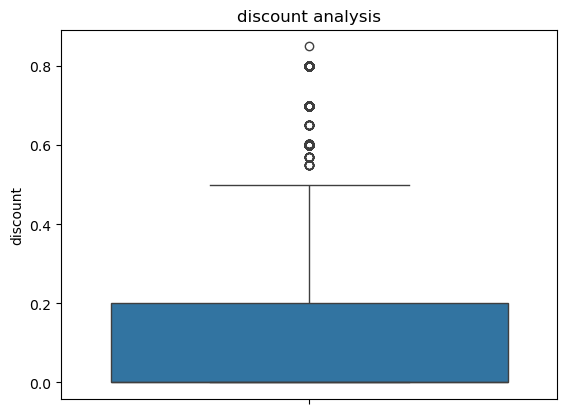

In [226]:
plt.title('discount analysis')
sns.boxplot(y= data['discount']);

In [227]:
Q1 = data['discount'].quantile(0.25)
Q3 = data['discount'].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)

0.0
0.2
0.2


In [228]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print(lower)
print(upper)

-0.30000000000000004
0.5


In [229]:
data[(data['discount']<lower) |(data['discount']>upper)]

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,delivery_days
11,IN-2011-65159,2011-03-01,2011-07-01,Second Class,Larry Blacks,Consumer,National Capital,Philippines,APAC,Southeast Asia,...,Tables,"Chromcraft Round Table, Adjustable Height",211,1,0.55,-70.3995,21.32,High,2011,122
33,US-2011-136007,2011-04-01,2011-11-01,Standard Class,Beth Thompson,Home Office,Alagoas,Brazil,LATAM,South,...,Envelopes,"Jiffy Interoffice Envelope, Set of 50",74,6,0.60,-107.8560,7.04,Medium,2011,214
49,CA-2011-112326,2011-05-01,2011-09-01,Standard Class,Phillina Ober,Home Office,Illinois,United States,US,Central,...,Binders,GBC Standard Plastic Binding Systems Combs,4,2,0.80,-5.4870,0.55,High,2011,123
90,NI-2011-4770,2011-08-01,2011-11-01,Second Class,Joe Elijah,Consumer,Lagos,Nigeria,Africa,Africa,...,Binders,"Avery Index Tab, Economy",5,2,0.70,-4.5420,0.82,High,2011,92
186,TU-2011-4040,2011-01-14,2011-01-18,Standard Class,Bruce Degenhardt,Consumer,Gaziantep,Turkey,EMEA,EMEA,...,Storage,"Fellowes File Cart, Blue",110,2,0.60,-54.9720,11.53,Medium,2011,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51225,NI-2014-3370,2014-12-30,2015-04-01,Standard Class,Natalie Fritzler,Consumer,Oyo,Nigeria,Africa,Africa,...,Storage,"Smead Folders, Blue",5,1,0.70,-10.1730,0.27,Medium,2014,92
51226,NI-2014-3370,2014-12-30,2015-04-01,Standard Class,Natalie Fritzler,Consumer,Oyo,Nigeria,Africa,Africa,...,Binders,"Ibico Binder Covers, Recycled",4,1,0.70,-4.6470,0.23,Medium,2014,92
51231,IN-2014-30390,2014-12-31,2015-03-01,First Class,Justin Deggeller,Corporate,Bangkok,Thailand,APAC,Southeast Asia,...,Tables,"Lesro Training Table, Adjustable Height","1,049",9,0.57,-1195.2387,86.86,High,2014,60
51249,TU-2014-5170,2014-12-31,2015-04-01,Second Class,Valerie Dominguez,Consumer,Konya,Turkey,EMEA,EMEA,...,Furnishings,"Tenex Frame, Erganomic",174,4,0.60,-117.3600,13.72,Medium,2014,91


In [230]:
up = data[data['discount']<lower]
up

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,delivery_days


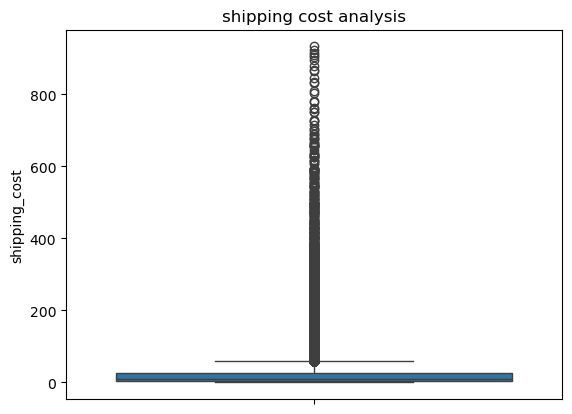

In [222]:
plt.title('shipping cost analysis')
sns.boxplot(y= data['shipping_cost']);

In [223]:
q11 = data['shipping_cost'].quantile(0.25)
q33 = data['shipping_cost'].quantile(0.75)
IQR = q33 - q11
print(q11)
print(q33)
print(IQR)

2.66
25.09
22.43


In [224]:
low = q11 - 1.5*IQR
up = q33 + 1.5*IQR
print(low)
print(up)

-30.984999999999996
58.735


In [203]:
data[(data['shipping_cost']<low) |(data['shipping_cost']>up)]

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,delivery_days
7,IN-2011-79397,2011-03-01,2011-03-01,Same Day,Kean Nguyen,Corporate,New South Wales,Australia,APAC,Oceania,...,Appliances,"Hoover Microwave, White",276,1,0.100,110.4120,125.32,Critical,2011,0
8,ID-2011-80230,2011-03-01,2011-09-01,Standard Class,Ken Lonsdale,Consumer,Auckland,New Zealand,APAC,Oceania,...,Copiers,"Hewlett Wireless Fax, Laser",912,4,0.400,-319.4640,107.10,Low,2011,184
9,IZ-2011-4680,2011-03-01,2011-07-01,Standard Class,Lindsay Williams,Corporate,Ninawa,Iraq,EMEA,EMEA,...,Chairs,"Novimex Swivel Stool, Set of Two",667,4,0.000,253.3200,81.26,High,2011,122
27,MX-2011-111255,2011-04-01,2011-09-01,Second Class,Russell Applegate,Consumer,Parana,Brazil,LATAM,South,...,Bookcases,"Dania Classic Bookcase, Pine","1,648",6,0.000,609.8400,109.13,Medium,2011,153
43,MX-2011-109267,2011-05-01,2011-09-01,Standard Class,Jennifer Halladay,Consumer,Veracruz,Mexico,LATAM,North,...,Appliances,"Hoover Stove, Black","3,029",8,0.000,999.3600,191.20,Medium,2011,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51157,ID-2014-52902,2014-12-30,2015-01-01,First Class,Julia West,Consumer,Ho Chí Minh City,Vietnam,APAC,Southeast Asia,...,Bookcases,"Ikea 3-Shelf Cabinet, Pine",272,3,0.370,-69.0669,68.07,High,2014,2
51228,MX-2014-116267,2014-12-31,2015-03-01,Second Class,Erica Bern,Corporate,São Paulo,Brazil,LATAM,South,...,Copiers,"Canon Wireless Fax, Color","1,264",5,0.002,301.4660,253.25,High,2014,60
51229,IN-2014-43550,2014-12-31,2015-01-01,First Class,Marina Lichtenstein,Corporate,Jakarta,Indonesia,APAC,Southeast Asia,...,Bookcases,"Safco Library with Doors, Pine","1,091",3,0.070,46.9206,243.11,High,2014,1
51230,RS-2014-1460,2014-12-31,2015-02-01,Second Class,Peter Bühler,Consumer,Bashkortostan,Russia,EMEA,EMEA,...,Copiers,"Hewlett Personal Copier, Laser",866,6,0.000,51.8400,138.18,High,2014,32


In [225]:
data[data['shipping_cost']<low]

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,delivery_days


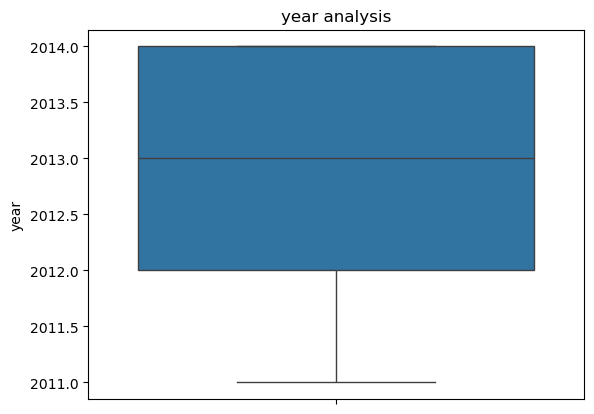

In [198]:
plt.title('year analysis')
sns.boxplot(y= data['year']);

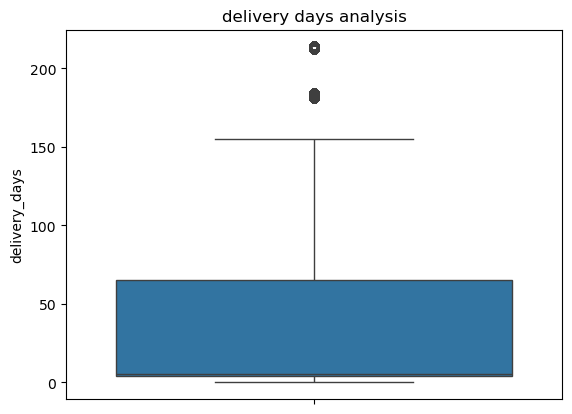

In [200]:
plt.title('delivery days analysis')
sns.boxplot(y= data['delivery_days']);

In [242]:
a1 = data['delivery_days'].quantile(0.25)
a3 = data['delivery_days'].quantile(0.75)
I = a3 - a1
print(a1)
print(a3)
print(I)

4.0
65.0
61.0


In [243]:
low = a1 - 1.5*I
up = a3 + 1.5*I
print(low)
print(up)

-87.5
156.5


In [244]:
data[(data['delivery_days']<low) |(data['delivery_days']>up)]

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,delivery_days
1,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.0360,9.72,Medium,2011,212
4,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.7700,4.70,Medium,2011,212
5,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55,2,0.1,15.3420,1.80,Medium,2011,212
8,ID-2011-80230,2011-03-01,2011-09-01,Standard Class,Ken Lonsdale,Consumer,Auckland,New Zealand,APAC,Oceania,...,Copiers,"Hewlett Wireless Fax, Laser",912,4,0.4,-319.4640,107.10,Low,2011,184
13,IN-2011-33652,2011-03-01,2011-09-01,Standard Class,Dennis Pardue,Home Office,Sarawak,Malaysia,APAC,Southeast Asia,...,Copiers,"Hewlett Fax and Copier, Laser",193,1,0.0,50.1300,10.40,Medium,2011,184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49616,IT-2014-5285883,2014-06-12,2014-12-12,Standard Class,Phillip Breyer,Corporate,North Brabant,Netherlands,EU,Central,...,Labels,"Hon File Folder Labels, 5000 Label Set",41,9,0.5,-0.1350,1.38,Medium,2014,183
49619,CA-2014-105235,2014-06-12,2014-12-12,Standard Class,Suzanne McNair,Corporate,New York,United States,US,East,...,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,21,3,0.0,6.0726,1.12,Medium,2014,183
51247,IN-2014-23754,2014-12-31,2015-07-01,Standard Class,Kalyca Meade,Corporate,Guangdong,China,APAC,North Asia,...,Accessories,"Enermax Numeric Keypad, Bluetooth",172,3,0.0,6.8400,16.66,Medium,2014,182
51270,IN-2014-23754,2014-12-31,2015-07-01,Standard Class,Kalyca Meade,Corporate,Guangdong,China,APAC,North Asia,...,Envelopes,"Ames Business Envelopes, Recycled",67,5,0.0,24.7500,4.06,Medium,2014,182


In [245]:
data[data['delivery_days']<low]

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,delivery_days


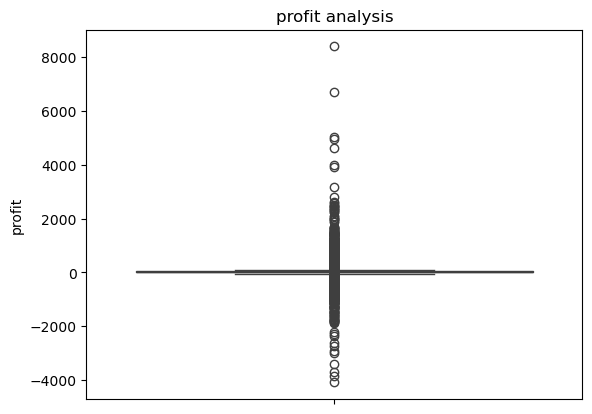

In [248]:
plt.title('profit analysis')
sns.boxplot(y= data['profit']);

In [249]:
Q11 = data['profit'].quantile(0.25)
Q33 = data['profit'].quantile(0.75)
IQR = Q33 - Q11
print(Q11)
print(Q33)
print(IQR)

0.0
36.635000000000005
36.635000000000005


In [250]:
lower = Q11 - 1.5*IQR
upper = Q33 + 1.5*IQR
print(lower)
print(upper)

-54.95250000000001
91.5875


In [251]:
data[(data['profit']<lower) |(data['profit']>upper)]

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,delivery_days
0,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408,2,0.00,106.1400,35.46,Medium,2011,151
7,IN-2011-79397,2011-03-01,2011-03-01,Same Day,Kean Nguyen,Corporate,New South Wales,Australia,APAC,Oceania,...,Appliances,"Hoover Microwave, White",276,1,0.10,110.4120,125.32,Critical,2011,0
8,ID-2011-80230,2011-03-01,2011-09-01,Standard Class,Ken Lonsdale,Consumer,Auckland,New Zealand,APAC,Oceania,...,Copiers,"Hewlett Wireless Fax, Laser",912,4,0.40,-319.4640,107.10,Low,2011,184
9,IZ-2011-4680,2011-03-01,2011-07-01,Standard Class,Lindsay Williams,Corporate,Ninawa,Iraq,EMEA,EMEA,...,Chairs,"Novimex Swivel Stool, Set of Two",667,4,0.00,253.3200,81.26,High,2011,122
10,IN-2011-65159,2011-03-01,2011-07-01,Second Class,Larry Blacks,Consumer,National Capital,Philippines,APAC,Southeast Asia,...,Storage,"Tenex Lockers, Industrial",338,3,0.45,-122.8005,33.75,High,2011,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51239,ID-2014-54442,2014-12-31,2015-04-01,Standard Class,Muhammed Yedwab,Corporate,National Capital,Philippines,APAC,Southeast Asia,...,Copiers,"Hewlett Copy Machine, Laser",685,4,0.35,-63.2340,42.92,Medium,2014,91
51245,IN-2014-75603,2014-12-31,2015-05-01,Second Class,Bill Shonely,Corporate,Andhra Pradesh,India,APAC,Central Asia,...,Accessories,"Memorex Keyboard, Erganomic",277,4,0.00,105.0000,21.84,Medium,2014,121
51249,TU-2014-5170,2014-12-31,2015-04-01,Second Class,Valerie Dominguez,Consumer,Konya,Turkey,EMEA,EMEA,...,Furnishings,"Tenex Frame, Erganomic",174,4,0.60,-117.3600,13.72,Medium,2014,91
51252,OD-2014-9490,2014-12-31,2015-05-01,Standard Class,Mitch Willingham,Corporate,Central Equatoria,South Sudan,Africa,Africa,...,Copiers,"Canon Wireless Fax, Digital",378,1,0.00,166.4400,11.71,Medium,2014,121


In [254]:
loss = data[data['profit']<lower]
loss

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,delivery_days
8,ID-2011-80230,2011-03-01,2011-09-01,Standard Class,Ken Lonsdale,Consumer,Auckland,New Zealand,APAC,Oceania,...,Copiers,"Hewlett Wireless Fax, Laser",912,4,0.40,-319.4640,107.10,Low,2011,184
10,IN-2011-65159,2011-03-01,2011-07-01,Second Class,Larry Blacks,Consumer,National Capital,Philippines,APAC,Southeast Asia,...,Storage,"Tenex Lockers, Industrial",338,3,0.45,-122.8005,33.75,High,2011,122
11,IN-2011-65159,2011-03-01,2011-07-01,Second Class,Larry Blacks,Consumer,National Capital,Philippines,APAC,Southeast Asia,...,Tables,"Chromcraft Round Table, Adjustable Height",211,1,0.55,-70.3995,21.32,High,2011,122
14,ID-2011-80230,2011-03-01,2011-09-01,Standard Class,Ken Lonsdale,Consumer,Auckland,New Zealand,APAC,Oceania,...,Chairs,"Hon Rocking Chair, Set of Two",159,2,0.40,-95.6760,10.07,Low,2011,184
33,US-2011-136007,2011-04-01,2011-11-01,Standard Class,Beth Thompson,Home Office,Alagoas,Brazil,LATAM,South,...,Envelopes,"Jiffy Interoffice Envelope, Set of 50",74,6,0.60,-107.8560,7.04,Medium,2011,214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51180,IT-2014-5517515,2014-12-30,2015-01-01,First Class,John Castell,Consumer,South Holland,Netherlands,EU,Central,...,Appliances,"Cuisinart Blender, Silver",68,2,0.50,-62.3400,13.90,High,2014,2
51211,TU-2014-7130,2014-12-30,2014-12-31,First Class,Mitch Gastineau,Corporate,Aydin,Turkey,EMEA,EMEA,...,Storage,"Fellowes Lockers, Blue",166,2,0.60,-141.0360,2.26,High,2014,1
51231,IN-2014-30390,2014-12-31,2015-03-01,First Class,Justin Deggeller,Corporate,Bangkok,Thailand,APAC,Southeast Asia,...,Tables,"Lesro Training Table, Adjustable Height","1,049",9,0.57,-1195.2387,86.86,High,2014,60
51239,ID-2014-54442,2014-12-31,2015-04-01,Standard Class,Muhammed Yedwab,Corporate,National Capital,Philippines,APAC,Southeast Asia,...,Copiers,"Hewlett Copy Machine, Laser",685,4,0.35,-63.2340,42.92,Medium,2014,91


21. Which category has the highest loss?

In [293]:
loss_category = loss.groupby('category')['profit'].min()
loss_category

category
Furniture         -2750.2800
Office Supplies   -3701.8928
Technology        -4088.3760
Name: profit, dtype: float64

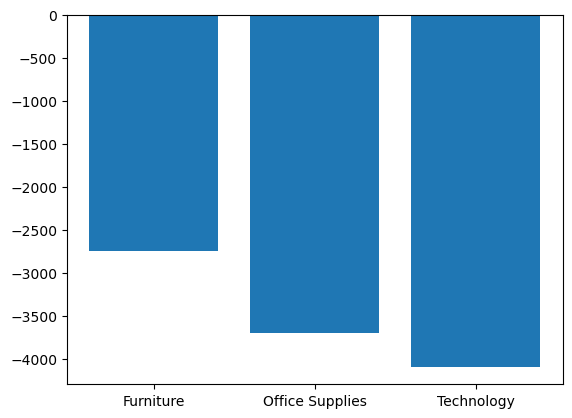

In [297]:
x = loss_category.index
y = loss_category.values
plt.bar(x,y);

The graph shows that Technology has the highest loss because it has the most negative value. Office Supplies also shows a high loss but less than Technology. Furniture has the lowest loss among the three categories. This means Technology is performing the worst in terms of profit.